In [1]:
import psycopg2

In [2]:
connection = psycopg2.connect("user=postgres", password="*******",
                              host="127.0.0.1", port="5432", database="JAP-Ecomerce")
cur = connection.cursor()

In [3]:
cur.execute("SELECT version();")
record = cur.fetchone()
print("You are connected to - ", record)

You are connected to -  ('PostgreSQL 15.2, compiled by Visual C++ build 1914, 64-bit',)


In [4]:
cur.execute("""SELECT table_name FROM information_schema.tables WHERE table_schema = 'public'""")
for table in cur.fetchall():
    print(table)

('customers_dataset',)
('geolocation_dataset',)
('order_payments_dataset',)
('order_review_dataset',)
('order_items_dataset',)
('order_dataset',)
('revenue',)
('canceled_order',)
('top_product',)
('most_canceled_product',)
('product_dataset',)
('seller_dataset',)


In [5]:
cur = connection.cursor()
cur.execute("SELECT mcp.year, r.sum AS revenue, co.count AS total_canceled, tp.product AS top_product, tp.revenue AS top_product_revenue, mcp.product AS most_canceled_product, mcp.total AS total_canceled_product FROM revenue AS r FULL JOIN canceled_order AS co ON r.year = co.year FULL JOIN top_product AS tp ON r.year = tp.year FULL JOIN most_canceled_product AS mcp ON mcp.year = r.year")
hasil = cur.fetchall()

# Mendapatkan daftar nama kolom dari objek kursor
kolom = [desc[0] for desc in cur.description]

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
df = pd.DataFrame(hasil, columns=kolom)  # Menyertakan daftar nama kolom saat membuat DataFrame
df.head()

,year,revenue,total_canceled,top_product,top_product_revenue,most_canceled_product,total_canceled_product
0,2016.0,46653.74,26.0,furniture_decor,6899.35,toys,3.0
1,2017.0,6921535.24,265.0,bed_bath_table,569964.78,sports_leisure,24.0
2,2018.0,8451584.77,334.0,health_beauty,877065.73,health_beauty,27.0
3,NaN,NaN,NaN,housewares,322.86,None,NaN
4,2020.0,NaN,NaN,None,NaN,housewares,1.0


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


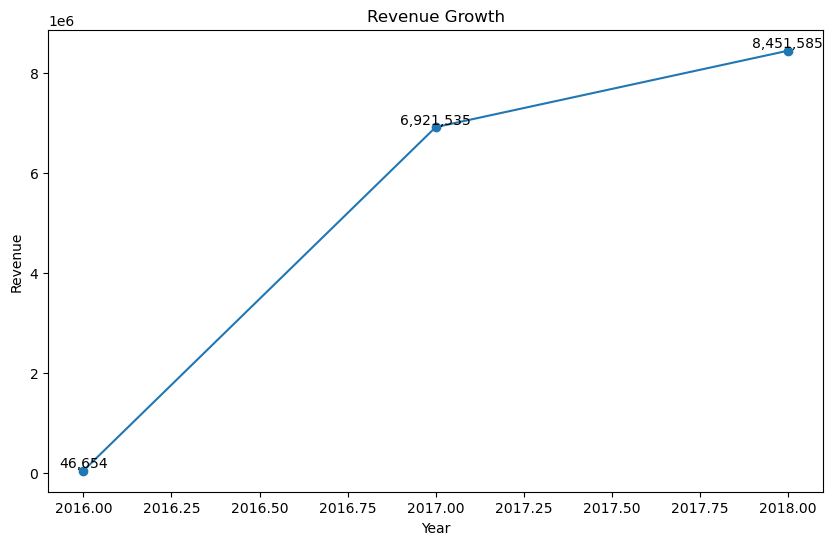

In [8]:

plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['revenue'], marker='o')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue Growth')

# Menghilangkan koma di belakang angka
for i in range(len(df['year'])):
    plt.text(df['year'][i], df['revenue'][i], '{:,.0f}'.format(df['revenue'][i]), ha='center', va='bottom')

plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


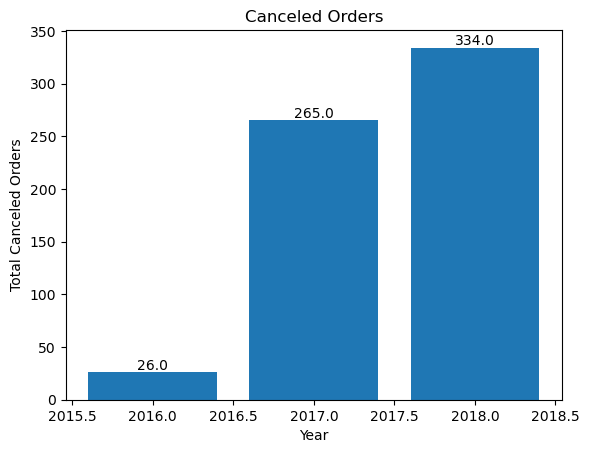

In [9]:
# Membuat bar plot
plt.bar(df['year'], df['total_canceled'])

# Menambahkan nilai di atas batang
for i in range(len(df['year'])):
    plt.text(df['year'][i], df['total_canceled'][i], str(df['total_canceled'][i]), ha='center', va='bottom')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Year')
plt.ylabel('Total Canceled Orders')

# Menambahkan judul pada plot
plt.title('Canceled Orders')

# Menampilkan plot
plt.show()

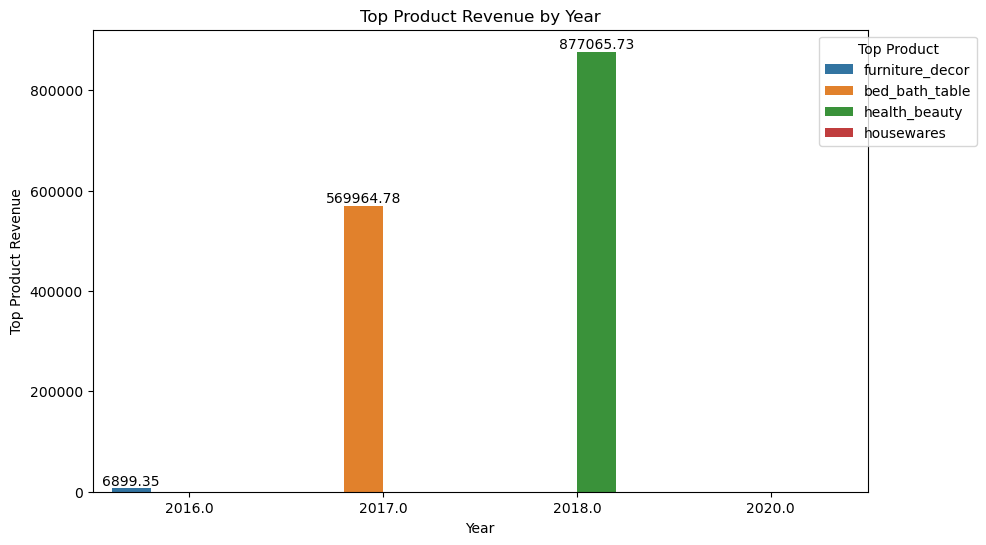

In [10]:

# Mengurutkan DataFrame berdasarkan tahun
df_sorted = df.sort_values('year')

# Membuat visualisasi menggunakan seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_sorted, x='year', y='top_product_revenue', hue='top_product')
plt.xlabel('Year')
plt.ylabel('Top Product Revenue')
plt.title('Top Product Revenue by Year')

# Menghilangkan grid
ax.grid(False)

# Menambahkan nilai di atas batang
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Memperluas label pada kolom top_product dalam legenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Top Product', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()

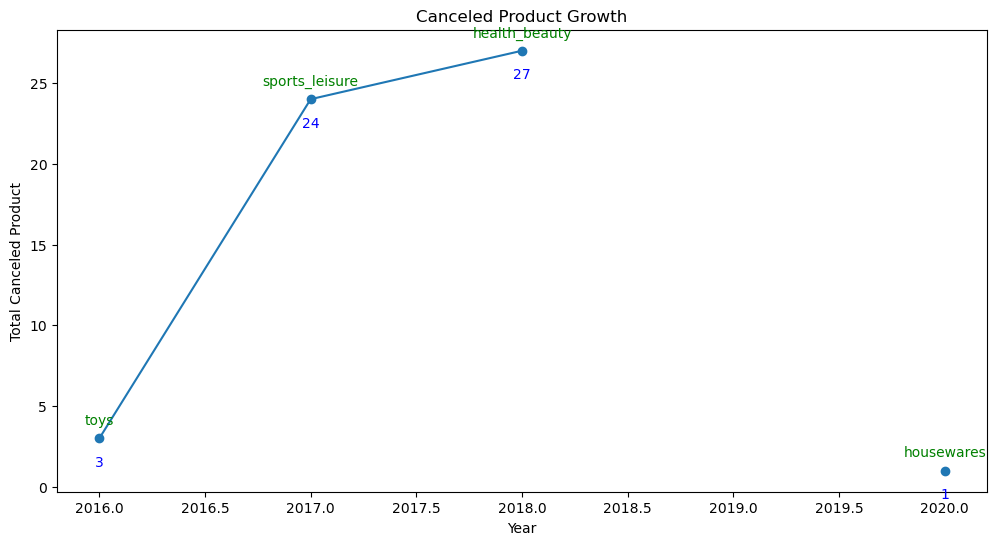

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['total_canceled_product'], marker='o')

# Menambahkan label di bawah titik pada kolom 'total_canceled_product' dengan warna biru
for i in range(len(df['year'])):
    plt.annotate('{:,.0f}'.format(df['total_canceled_product'][i]), 
                 xy=(df['year'][i], df['total_canceled_product'][i]), 
                 xytext=(0, -20), 
                 textcoords='offset points', 
                 ha='center',
                 color='blue')

# Menambahkan label di bawah titik pada kolom 'most_canceled_product' dengan warna merah
for i in range(len(df['year'])):
    plt.annotate(df['most_canceled_product'][i], 
                 xy=(df['year'][i], df['total_canceled_product'][i]), 
                 xytext=(0, 10), 
                 textcoords='offset points', 
                 ha='center',
                 color='green')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Year')
plt.ylabel('Total Canceled Product')
plt.title('Canceled Product Growth')

plt.show()


1.Pendapatan perusahaan meningkat dari tahun 2016 (46,653.74 unit) ke tahun 2017 (6,921,535.24 unit), dan mencapai puncaknya pada tahun 2018 (8,451,584.77 unit).

2.Jumlah pembatalan pesanan juga meningkat dari tahun 2016 (26 pesanan) ke tahun 2017 (265 pesanan), dan mencapai titik tertinggi pada tahun 2018 (334 pesanan). Ini menunjukkan adanya potensi masalah dalam proses pesanan atau kepuasan pelanggan.

3.Produk terlaris pada tahun 2016 adalah "furniture_decor" (pendapatan: 6,899.35 unit), pada tahun 2017 adalah "bed_bath_table" (pendapatan: 569,964.78 unit), dan pada tahun 2018 tetap "health_beauty" (pendapatan: 877,065.73 unit).

4.Produk yang paling banyak dibatalkan pada tahun 2016 adalah "toys" (3 pesanan), pada tahun 2017 adalah "sports_leisure" (24 pesanan), dan pada tahun 2018 adalah "health_beauty" (27 pesanan).

5.Data tahun 2020 tidak lengkap, namun terdapat informasi bahwa "housewares" adalah produk yang paling banyak dibatalkan dengan 1 pesanan dibatalkan.